In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [28]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [29]:
len(X_train),len(X_test)

(60000, 10000)

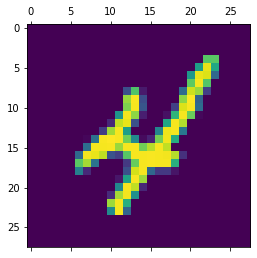

In [30]:
plt.matshow(X_train[9])

In [31]:
y_train[9]

4

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
X_train = X_train / 255
X_test = X_test / 255
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [34]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [35]:
X_train_flatten.shape

(60000, 784)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4879 - accuracy: 0.8772
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3062 - accuracy: 0.9164s - loss:
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2854 - accuracy: 0.9219
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2747 - accuracy: 0.9244
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2679 - accuracy: 0.9265


In [37]:
X_test_flatten.shape, y_test.shape

((10000, 784), (10000,))

In [38]:
y_pred = model.predict(X_test_flatten)
np.argmax(y_pred[1])

2

In [39]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [40]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    4,    2,    2,    0],
       [   0, 1107,    3,    2,    0,    2,    4,    2,   15,    0],
       [   5,    5,  925,   18,    7,    5,   12,   12,   40,    3],
       [   3,    0,   15,  934,    0,   17,    2,   12,   21,    6],
       [   1,    1,    5,    1,  910,    0,   10,    4,   11,   39],
       [   8,    1,    4,   45,    7,  777,    9,    4,   30,    7],
       [  11,    3,    6,    1,    7,   19,  906,    2,    3,    0],
       [   1,    5,   22,    8,    6,    0,    0,  955,    4,   27],
       [   7,    5,    7,   27,    9,   29,    8,   11,  866,    5],
       [  10,    6,    1,   10,   23,    8,    0,   30,   11,  910]])>

Text(69.0, 0.5, 'Truth')

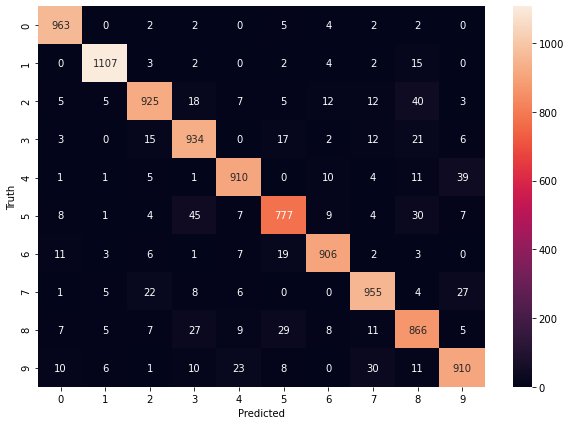

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2917 - accuracy: 0.9185
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1363 - accuracy: 0.9608
Epoch 3/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0993 - accuracy: 0.9704
Epoch 4/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0768 - accuracy: 0.9773
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0614 - accuracy: 0.9810


In [44]:
model.evaluate(X_test_flatten,y_test)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.0983 - accuracy: 0.9699


[0.09827214411981404, 0.9699]

Text(69.0, 0.5, 'Truth')

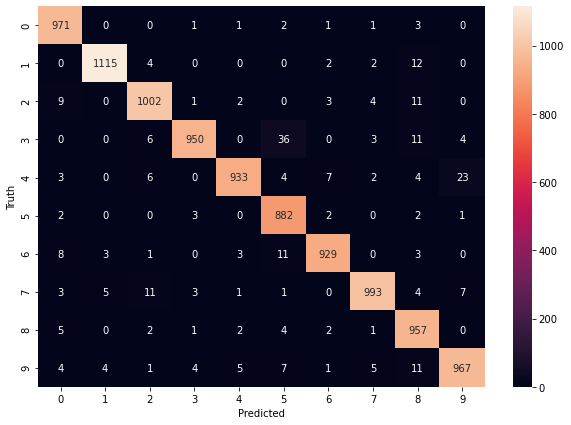

In [45]:
y_pred = model.predict(X_test_flatten)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4461 - accuracy: 0.8558
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1668 - accuracy: 0.9520
Epoch 3/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1187 - accuracy: 0.9661
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0915 - accuracy: 0.9730
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0733 - accuracy: 0.9782
